In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

import tensorflow as tf
from keras import models
from keras import layers

import math
from sklearn.model_selection import train_test_split, StratifiedKFold
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Dropout, Convolution2D, Conv2D, MaxPooling2D, Lambda, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, AveragePooling2D, Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils

from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline
keras.backend.set_image_data_format('channels_last')

In [39]:
df = pd.read_csv("credit_preprocessed.csv")

In [40]:
df.shape
df = df.drop('ID', axis=1)

In [41]:
def load_data_kfold(k):
    
    train = df
    
    X_train = np.array(df.drop('Class', axis=1).values)
    
    y_train = np.array(train["Class"].values)
    
    folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))
    
    return folds, X_train, y_train

# kNN - uniform

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn_Acertos_Total = np.asarray([])
knn_Falhas_Total = np.asarray([])

X = df.drop('Class', axis=1).values
y = df.Class.values

k = 2
folds, X_train, y_train = load_data_kfold(k)


for x in range(3, 24, 4):

    uniform_Falhas_Media = 0
    uniform_Acertos_Media = 0

    print("\n\nCom %d neighbors:\n" % (x))

    for j, (train_idx, val_idx) in enumerate(folds):

        print('\nFold ',j)
        X_train_cv = X_train[train_idx]
        y_train_cv = y_train[train_idx]
        X_valid_cv = X_train[val_idx]
        y_valid_cv = y_train[val_idx]

        neigh = KNeighborsClassifier(n_neighbors=x, weights='uniform')
        #TREINAMENTO
        neigh.fit(X_train_cv, y_train_cv)

        Test = neigh.predict(X_valid_cv)
        Real = y_valid_cv

        uniform_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
        uniform_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

        uniform_Falhas_Media = (uniform_Falhas_Media + uniform_Falhas)
        uniform_Acertos_Media = (uniform_Acertos_Media + uniform_Acertos)

        print("Resultado: %s falharam e %s acertaram" % (uniform_Falhas, uniform_Acertos))

    uniform_Falhas_Media = uniform_Falhas_Media/k
    uniform_Acertos_Media = uniform_Acertos_Media/k

    knn_Acertos_Total = np.append(knn_Acertos_Total, uniform_Acertos_Media)
    knn_Falhas_Total = np.append(knn_Falhas_Total, uniform_Falhas_Media)

    print("\nResultado Final (Média dos %s folds): %.2f falharam e %.2f acertaram" % (k, uniform_Falhas_Media, uniform_Acertos_Media))




Com 3 neighbors:


Fold  0
Resultado: 22.61 falharam e 77.39 acertaram

Fold  1
Resultado: 21.97 falharam e 78.03 acertaram

Resultado Final (Média dos 2 folds): 22.29 falharam e 77.71 acertaram


Com 7 neighbors:


Fold  0
Resultado: 19.66 falharam e 80.34 acertaram

Fold  1
Resultado: 19.44 falharam e 80.56 acertaram

Resultado Final (Média dos 2 folds): 19.55 falharam e 80.45 acertaram


Com 11 neighbors:


Fold  0
Resultado: 19.01 falharam e 80.99 acertaram

Fold  1
Resultado: 18.9 falharam e 81.1 acertaram

Resultado Final (Média dos 2 folds): 18.95 falharam e 81.04 acertaram


Com 15 neighbors:


Fold  0
Resultado: 18.82 falharam e 81.18 acertaram

Fold  1
Resultado: 18.78 falharam e 81.22 acertaram

Resultado Final (Média dos 2 folds): 18.80 falharam e 81.20 acertaram


Com 19 neighbors:


Fold  0
Resultado: 18.73 falharam e 81.27 acertaram

Fold  1
Resultado: 18.72 falharam e 81.28 acertaram

Resultado Final (Média dos 2 folds): 18.73 falharam e 81.28 acertaram


Com 23 neigh

(76, 82)

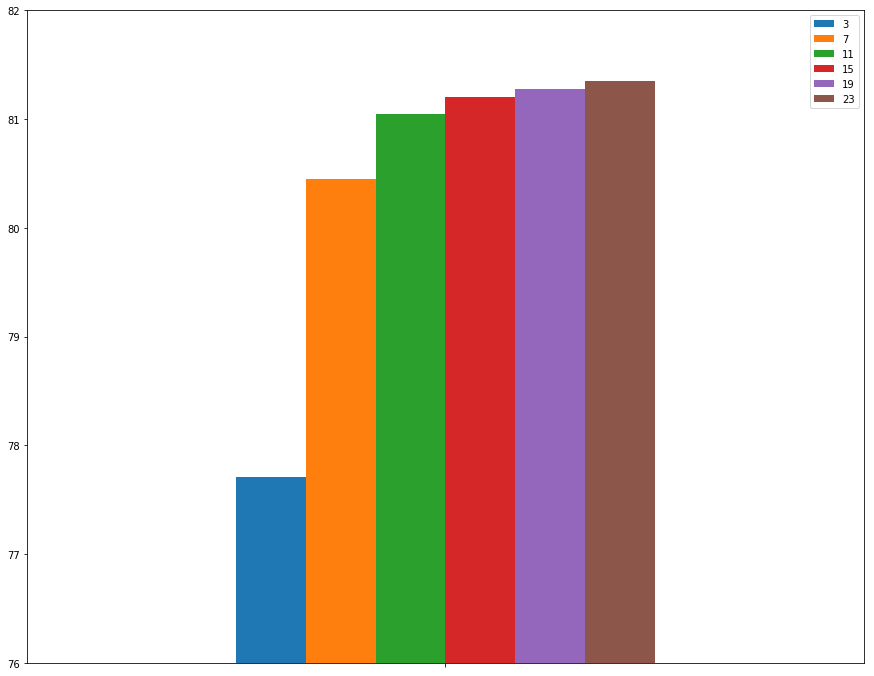

In [44]:
data = {'3':knn_Acertos_Total[0],
        '7':knn_Acertos_Total[1],
        '11':knn_Acertos_Total[2],
        '15':knn_Acertos_Total[3],
        '19':knn_Acertos_Total[4],
        '23':knn_Acertos_Total[5]}   


# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['']) 

ax = dfResultados.plot(figsize=(15,12), kind='bar')
ax.set_ylim(76, 82)



In [34]:
knn_Acertos_Total[1]

81.35

(18, 23)

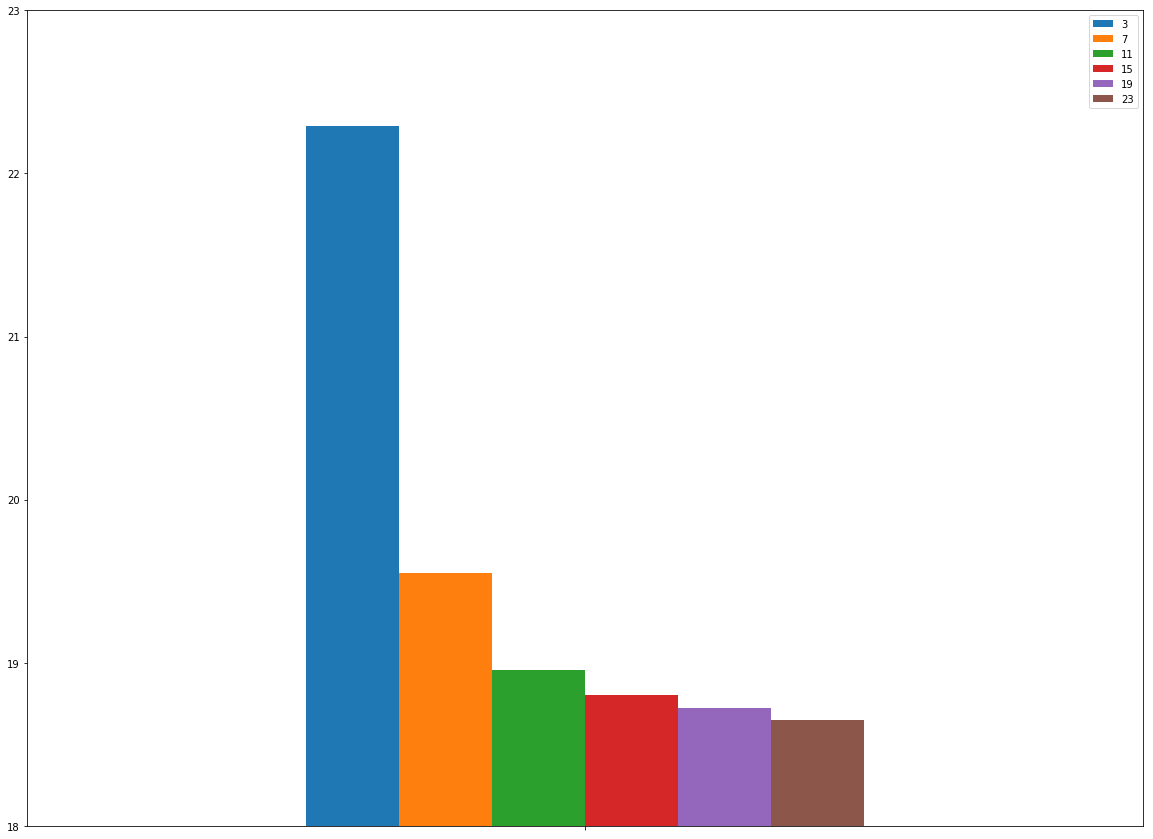

In [45]:
data = {'3':knn_Falhas_Total[0],
        '7':knn_Falhas_Total[1],
        '11':knn_Falhas_Total[2],
        '15':knn_Falhas_Total[3],
        '19':knn_Falhas_Total[4],
        '23':knn_Falhas_Total[5]}   

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['']) 

ax = dfResultados.plot(figsize=(20,15), kind='bar')
ax.set_ylim(18, 23)

# kNN - distance

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn_Acertos_Total = np.asarray([])
knn_Falhas_Total = np.asarray([])

X = df.drop('Class', axis=1).values
y = df.Class.values

k = 2
folds, X_train, y_train = load_data_kfold(k)


for x in range(3, 24, 4):

    distance_Falhas_Media = 0
    distance_Acertos_Media = 0

    print("\n\nCom %d neighbors:\n" % (x))

    for j, (train_idx, val_idx) in enumerate(folds):

        print('\nFold ',j)
        X_train_cv = X_train[train_idx]
        y_train_cv = y_train[train_idx]
        X_valid_cv = X_train[val_idx]
        y_valid_cv = y_train[val_idx]

        neigh = KNeighborsClassifier(n_neighbors=x, weights='distance')
        #TREINAMENTO
        neigh.fit(X_train_cv, y_train_cv)

        Test = neigh.predict(X_valid_cv)
        Real = y_valid_cv

        distance_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
        distance_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

        distance_Falhas_Media = (distance_Falhas_Media + distance_Falhas)
        distance_Acertos_Media = (distance_Acertos_Media + distance_Acertos)

        print("Resultado: %s falharam e %s acertaram" % (distance_Falhas, distance_Acertos))

    distance_Falhas_Media = distance_Falhas_Media/k
    distance_Acertos_Media = distance_Acertos_Media/k

    knn_Acertos_Total = np.append(knn_Acertos_Total, distance_Acertos_Media)
    knn_Falhas_Total = np.append(knn_Falhas_Total, distance_Falhas_Media)

    print("\nResultado Final (Média dos %s folds): %.2f falharam e %.2f acertaram" % (k, distance_Falhas_Media, distance_Acertos_Media))





Com 3 neighbors:


Fold  0
Resultado: 23.43 falharam e 76.57 acertaram

Fold  1
Resultado: 22.85 falharam e 77.15 acertaram

Resultado Final (Média dos 2 folds): 23.14 falharam e 76.86 acertaram


Com 7 neighbors:


Fold  0
Resultado: 20.58 falharam e 79.42 acertaram

Fold  1
Resultado: 20.49 falharam e 79.51 acertaram

Resultado Final (Média dos 2 folds): 20.53 falharam e 79.47 acertaram


Com 11 neighbors:


Fold  0
Resultado: 19.61 falharam e 80.39 acertaram

Fold  1
Resultado: 19.54 falharam e 80.46 acertaram

Resultado Final (Média dos 2 folds): 19.57 falharam e 80.42 acertaram


Com 15 neighbors:


Fold  0
Resultado: 19.31 falharam e 80.69 acertaram

Fold  1
Resultado: 19.21 falharam e 80.79 acertaram

Resultado Final (Média dos 2 folds): 19.26 falharam e 80.74 acertaram


Com 19 neighbors:


Fold  0
Resultado: 19.03 falharam e 80.97 acertaram

Fold  1
Resultado: 19.03 falharam e 80.97 acertaram

Resultado Final (Média dos 2 folds): 19.03 falharam e 80.97 acertaram


Com 23 nei

(76, 82)

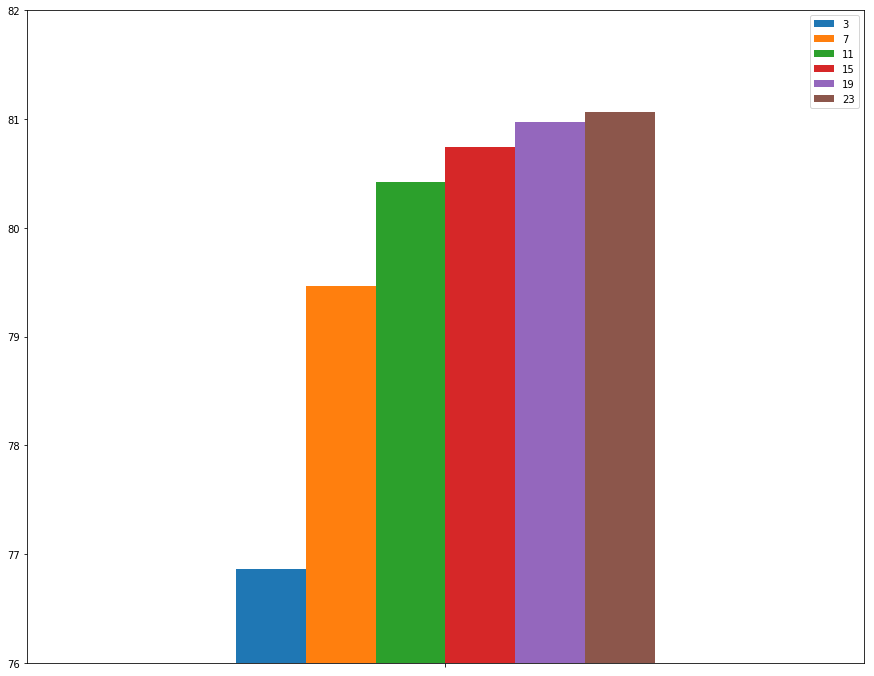

In [49]:
data = {'3':knn_Acertos_Total[0],
        '7':knn_Acertos_Total[1],
        '11':knn_Acertos_Total[2],
        '15':knn_Acertos_Total[3],
        '19':knn_Acertos_Total[4],
        '23':knn_Acertos_Total[5]}   

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['']) 

ax = dfResultados.plot(figsize=(15,12), kind='bar')
ax.set_ylim(76, 82)




(19, 24)

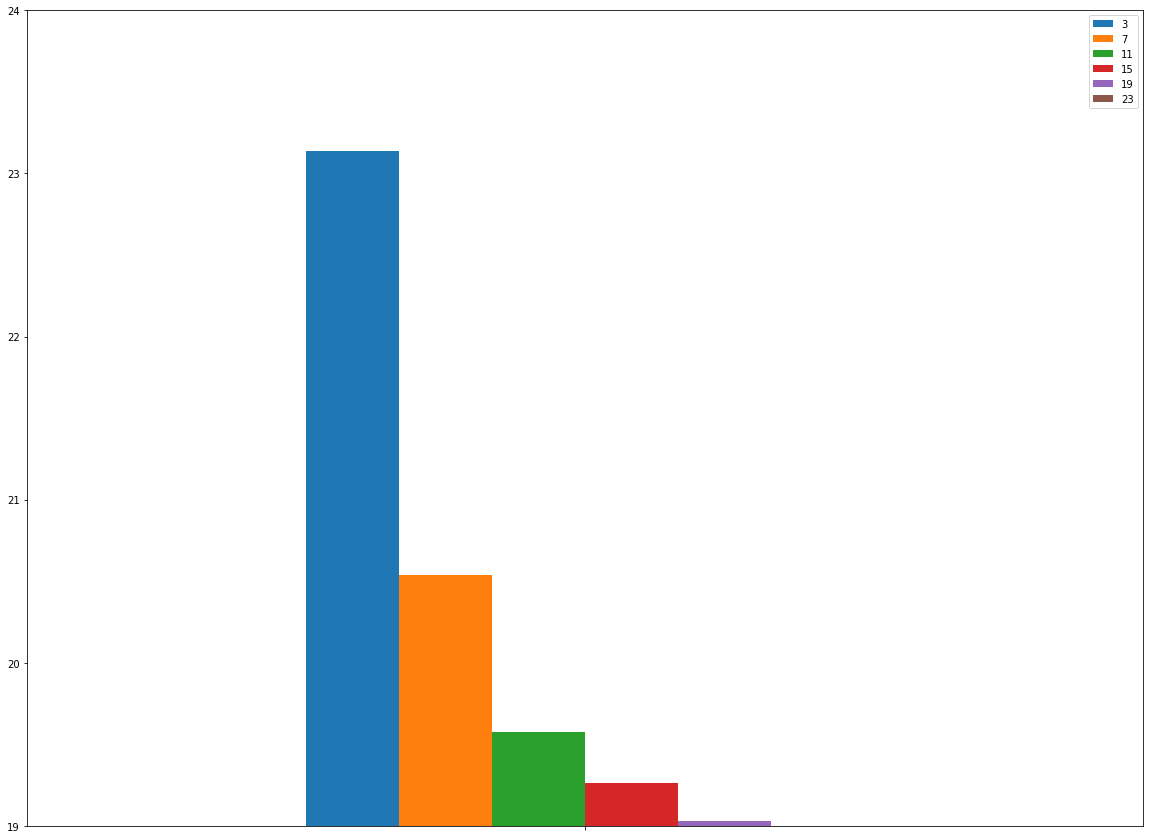

In [48]:
data = {'3':knn_Falhas_Total[0],
        '7':knn_Falhas_Total[1],
        '11':knn_Falhas_Total[2],
        '15':knn_Falhas_Total[3],
        '19':knn_Falhas_Total[4],
        '23':knn_Falhas_Total[5]}   

# Creates pandas DataFrame. 
dfResultados = pd.DataFrame(data, index =['']) 

ax = dfResultados.plot(figsize=(20,15), kind='bar')
ax.set_ylim(19, 24)